<a href="https://colab.research.google.com/github/Patriciafg27/MIA3_Actividades_Grupo4/blob/main/Hunger_games_Patricia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

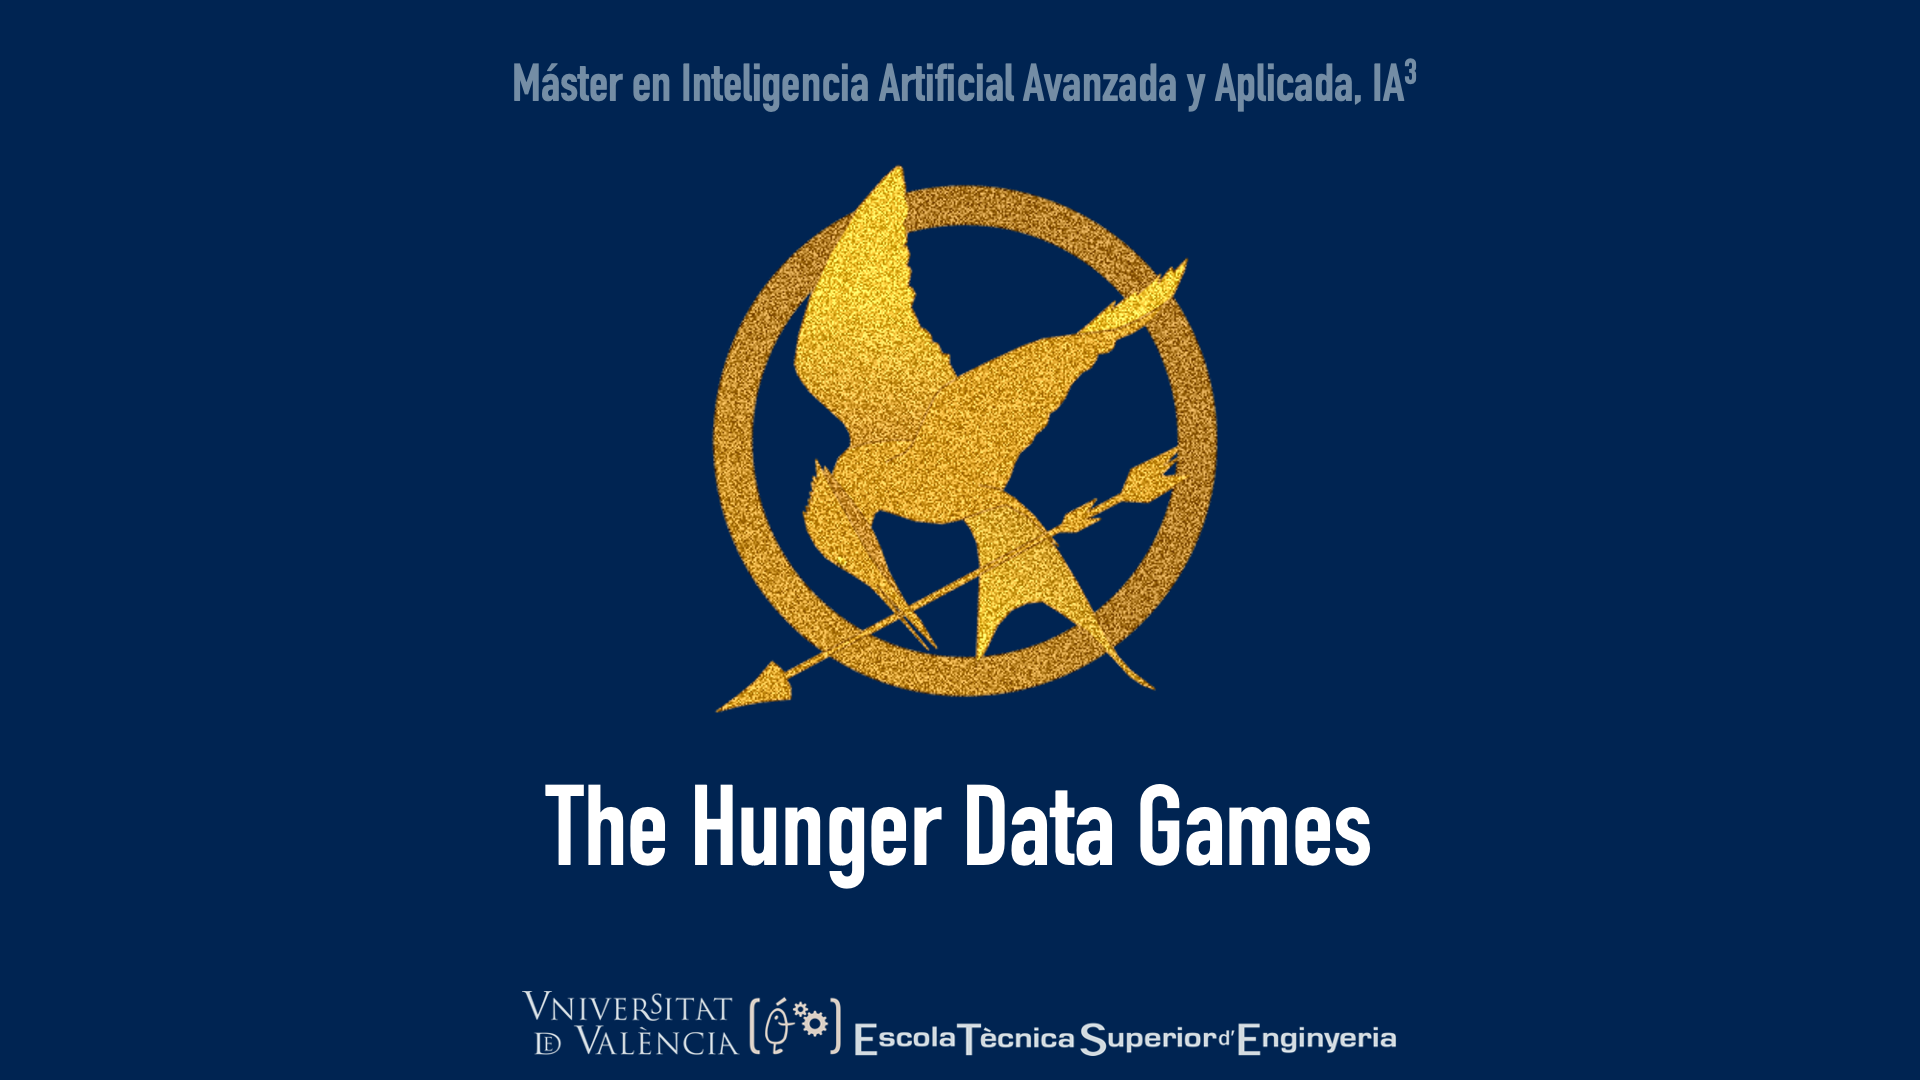

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/glass.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [3]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

In case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

____________________________________________________________________________

____________________________________________________________________________

**ESQUEMA EJERCICIO:**
1. Importacion de paquetes a necesitar para el ejercicio
2. Preprocesado de datos
  - Comprobación de valores nulos
  - Búsqueda de outliers -> regla intercuartil
  - Visualizacion de los datos
3. Arbol de decision
  - Evaluamos el modelo
4. Arbol de decisión con hiperparametros
  - Evaluamos el modelo
5. Modelo bagging

**1. IMPORTACION DE PAQUETES NECESARIOS**


In [39]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

import plotly.express as px
import matplotlib.pyplot as plt

**2. PREPROCESADO DE DATOS**

In [5]:
# Mi dataset:

dataframe

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
# Primero vemos las variables numericas que contiene mi dataset

dataframe.describe() 

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# Segundo, compruebo si hay valores nulos

dataframe.isnull().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

- Busqueda de outliers --> regla intercuartil


In [8]:
# Calculamos iqr para todas las variables

dataset = dataframe.iloc[:, :-1]
describe_df = dataset.describe()
iqr = describe_df.loc["75%"] - describe_df.loc["25%"]
iqr

refractive_index    0.002635
sodium              0.917500
magnesium           1.485000
aluminum            0.440000
silicon             0.807500
potassium           0.487500
calcium             0.932500
barium              0.000000
iron                0.100000
dtype: float64

In [9]:
# Calculamos los limites
upper_bound = describe_df.loc["75%"]+1.5*iqr #superior
lower_bound = describe_df.loc["25%"]-1.5*iqr #inferior

In [10]:
# Filtramos con pandas para ver los outliers
# Encontramos los outliers
bool_index = dataset > upper_bound
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
dataset.loc[bool_index2]

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00
44,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.00,0.30
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [11]:
# Encontramos que variable produce el outlier
bool_index.loc[bool_index2]

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
5,False,False,False,False,False,False,False,False,True
32,False,False,False,False,False,False,False,True,False
36,False,False,False,False,False,False,False,True,False
44,False,False,False,False,False,False,False,False,True
47,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
209,False,False,False,True,False,False,False,True,False
210,False,False,False,False,False,False,False,True,False
211,False,False,False,False,False,False,False,True,False
212,False,False,False,False,False,False,False,True,False


In [12]:
# Encontramos los outliers
bool_index = dataset < lower_bound
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
dataset.loc[bool_index2]


,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00


In [13]:
bool_index.loc[bool_index2] # Variable produce el outlier

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
21,False,False,False,True,False,False,False,False,False
38,False,False,False,True,False,False,False,False,False
39,False,False,False,True,False,False,False,False,False
50,False,False,False,True,False,False,False,False,False
56,True,False,False,False,False,False,False,False,False
103,False,False,False,False,True,False,False,False,False
105,False,True,False,False,False,False,False,False,False
106,False,True,False,False,True,False,False,False,False
107,False,False,False,False,True,False,False,False,False
110,False,True,False,False,False,False,False,False,False


- Analisis de resultados obtenidos

In [13]:
# Bueno, al final no vamos a quitar ningun outlier dado que sino nos quedamos sin casi datos.
# Y además tb hemos visto que no tenemos valroes nulos.

- Visualizo los datos

In [14]:
# Visualizo los datos
figura = px.scatter(dataframe, x='sodium', y='magnesium', color = 'sodium', symbol = 'type_of_glass')
figura

In [16]:
figura2 = px.scatter_3d(dataframe, x='sodium', y='magnesium', z = 'aluminum',
                       color = 'sodium', symbol = 'type_of_glass')
figura2

**3. ARBOL DE DECISION**

In [14]:
X = dataframe.iloc[:,:-1]
Y = dataframe.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [15]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

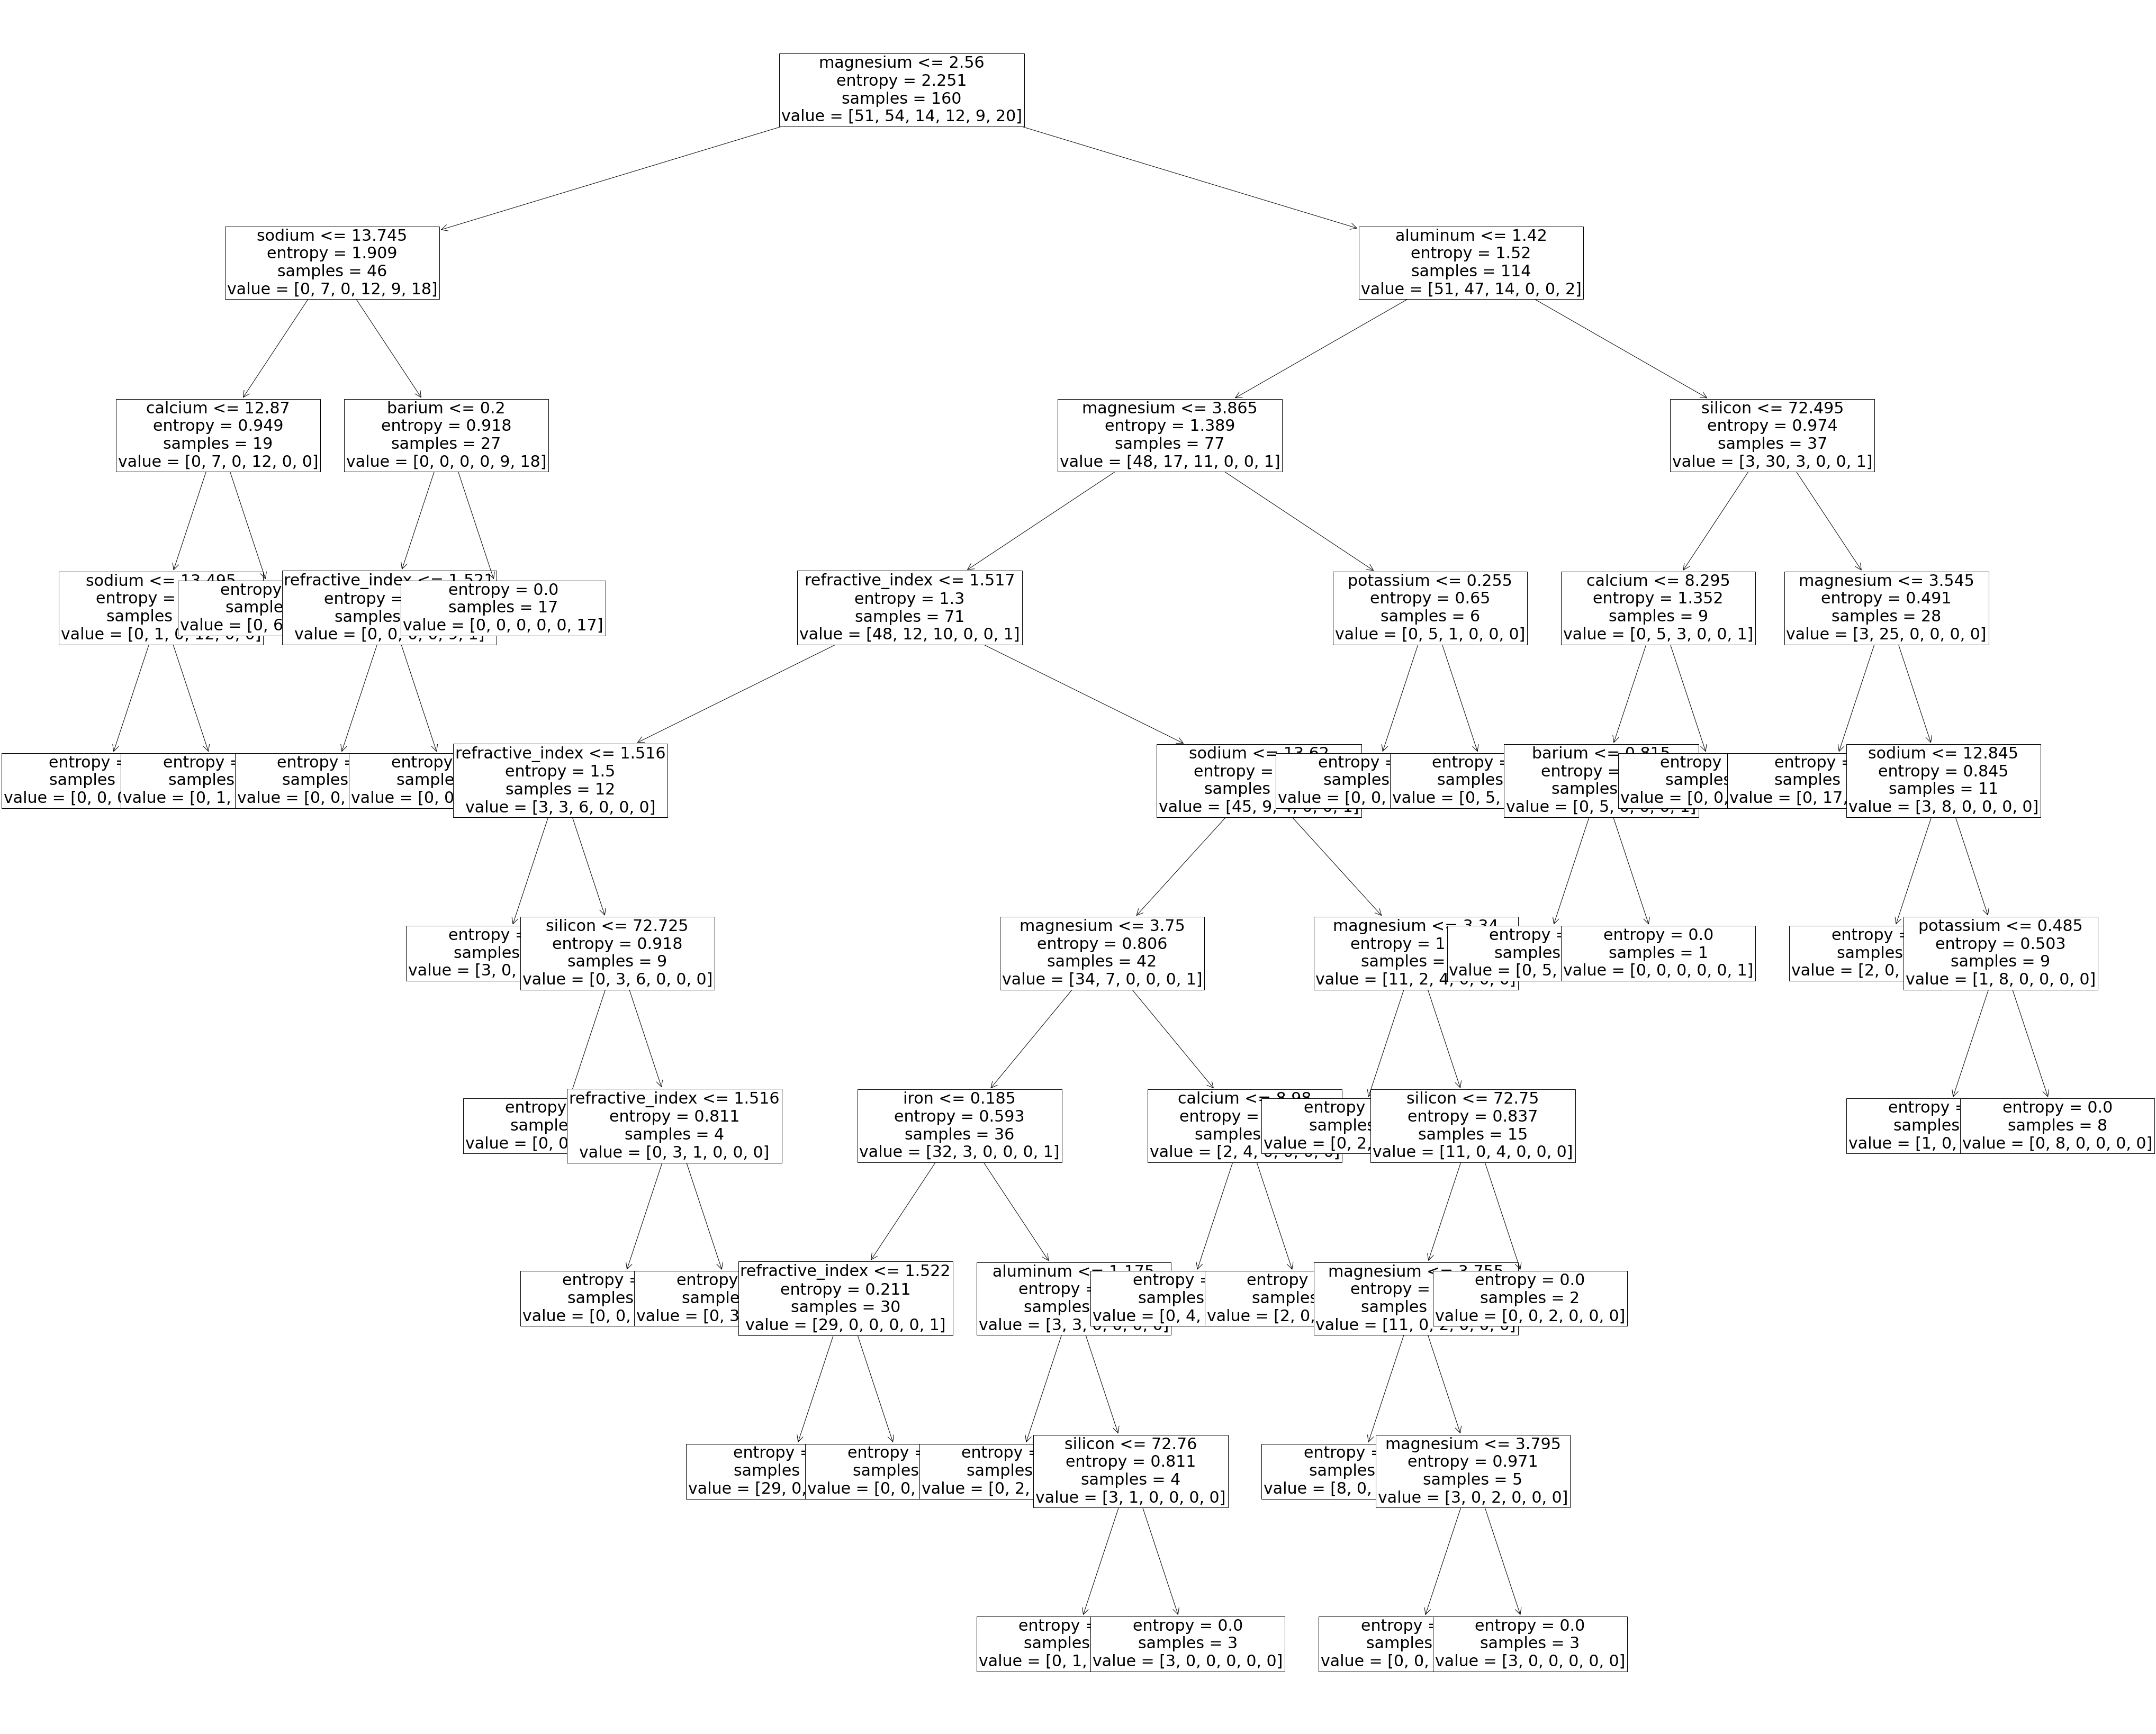

In [16]:
# Vemos gráficamente el arbol de decisión que se ha calculado:
figura, ax = plt.subplots(figsize=(70, 60))
plot_tree(model, feature_names= X.columns, fontsize=30)
plt.show()

- EVALUAMOS EL MODELO

In [17]:
# Vemos que el entrenamiento consigue un 100%
model.score(X_train, Y_train)*100

100.0

In [18]:
# Vemos que para el test:
model.score(X_test, Y_test)*100

62.96296296296296

In [19]:
# Evaluciacion 
f1_score(Y_test, model.predict(X_test), average='micro')

0.6296296296296297

In [20]:
balanced_accuracy_score(Y_test, model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning:

y_pred contains classes not in y_true



0.47868155236576293

- Analisis de resultados

El algoritmo ha hecho que encaje perfectamente (100%) para el dataset de entrenamiento, dado que la división es ideal. 
Sin emabrgo, cuando lo hacemos en el siguiente conjunto de datos, vemos que siendo del 68% no es una división perfecta.
Obtenemos asi, overfiting.
El algoritmo resuelve de manera incorrecta, o por lo menos no de la forma más optima.
Por lo que decidimos hacer un arbol de decisión con hiperparametros para obtener un mejor resultado en la parte de test.

**4. ARBOL DE DECISION CON HIPERPARAMETROS**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
model = DecisionTreeClassifier(criterion="entropy", max_depth = 10, min_samples_split=8, min_samples_leaf=5)
model.fit(X_train, Y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=8)

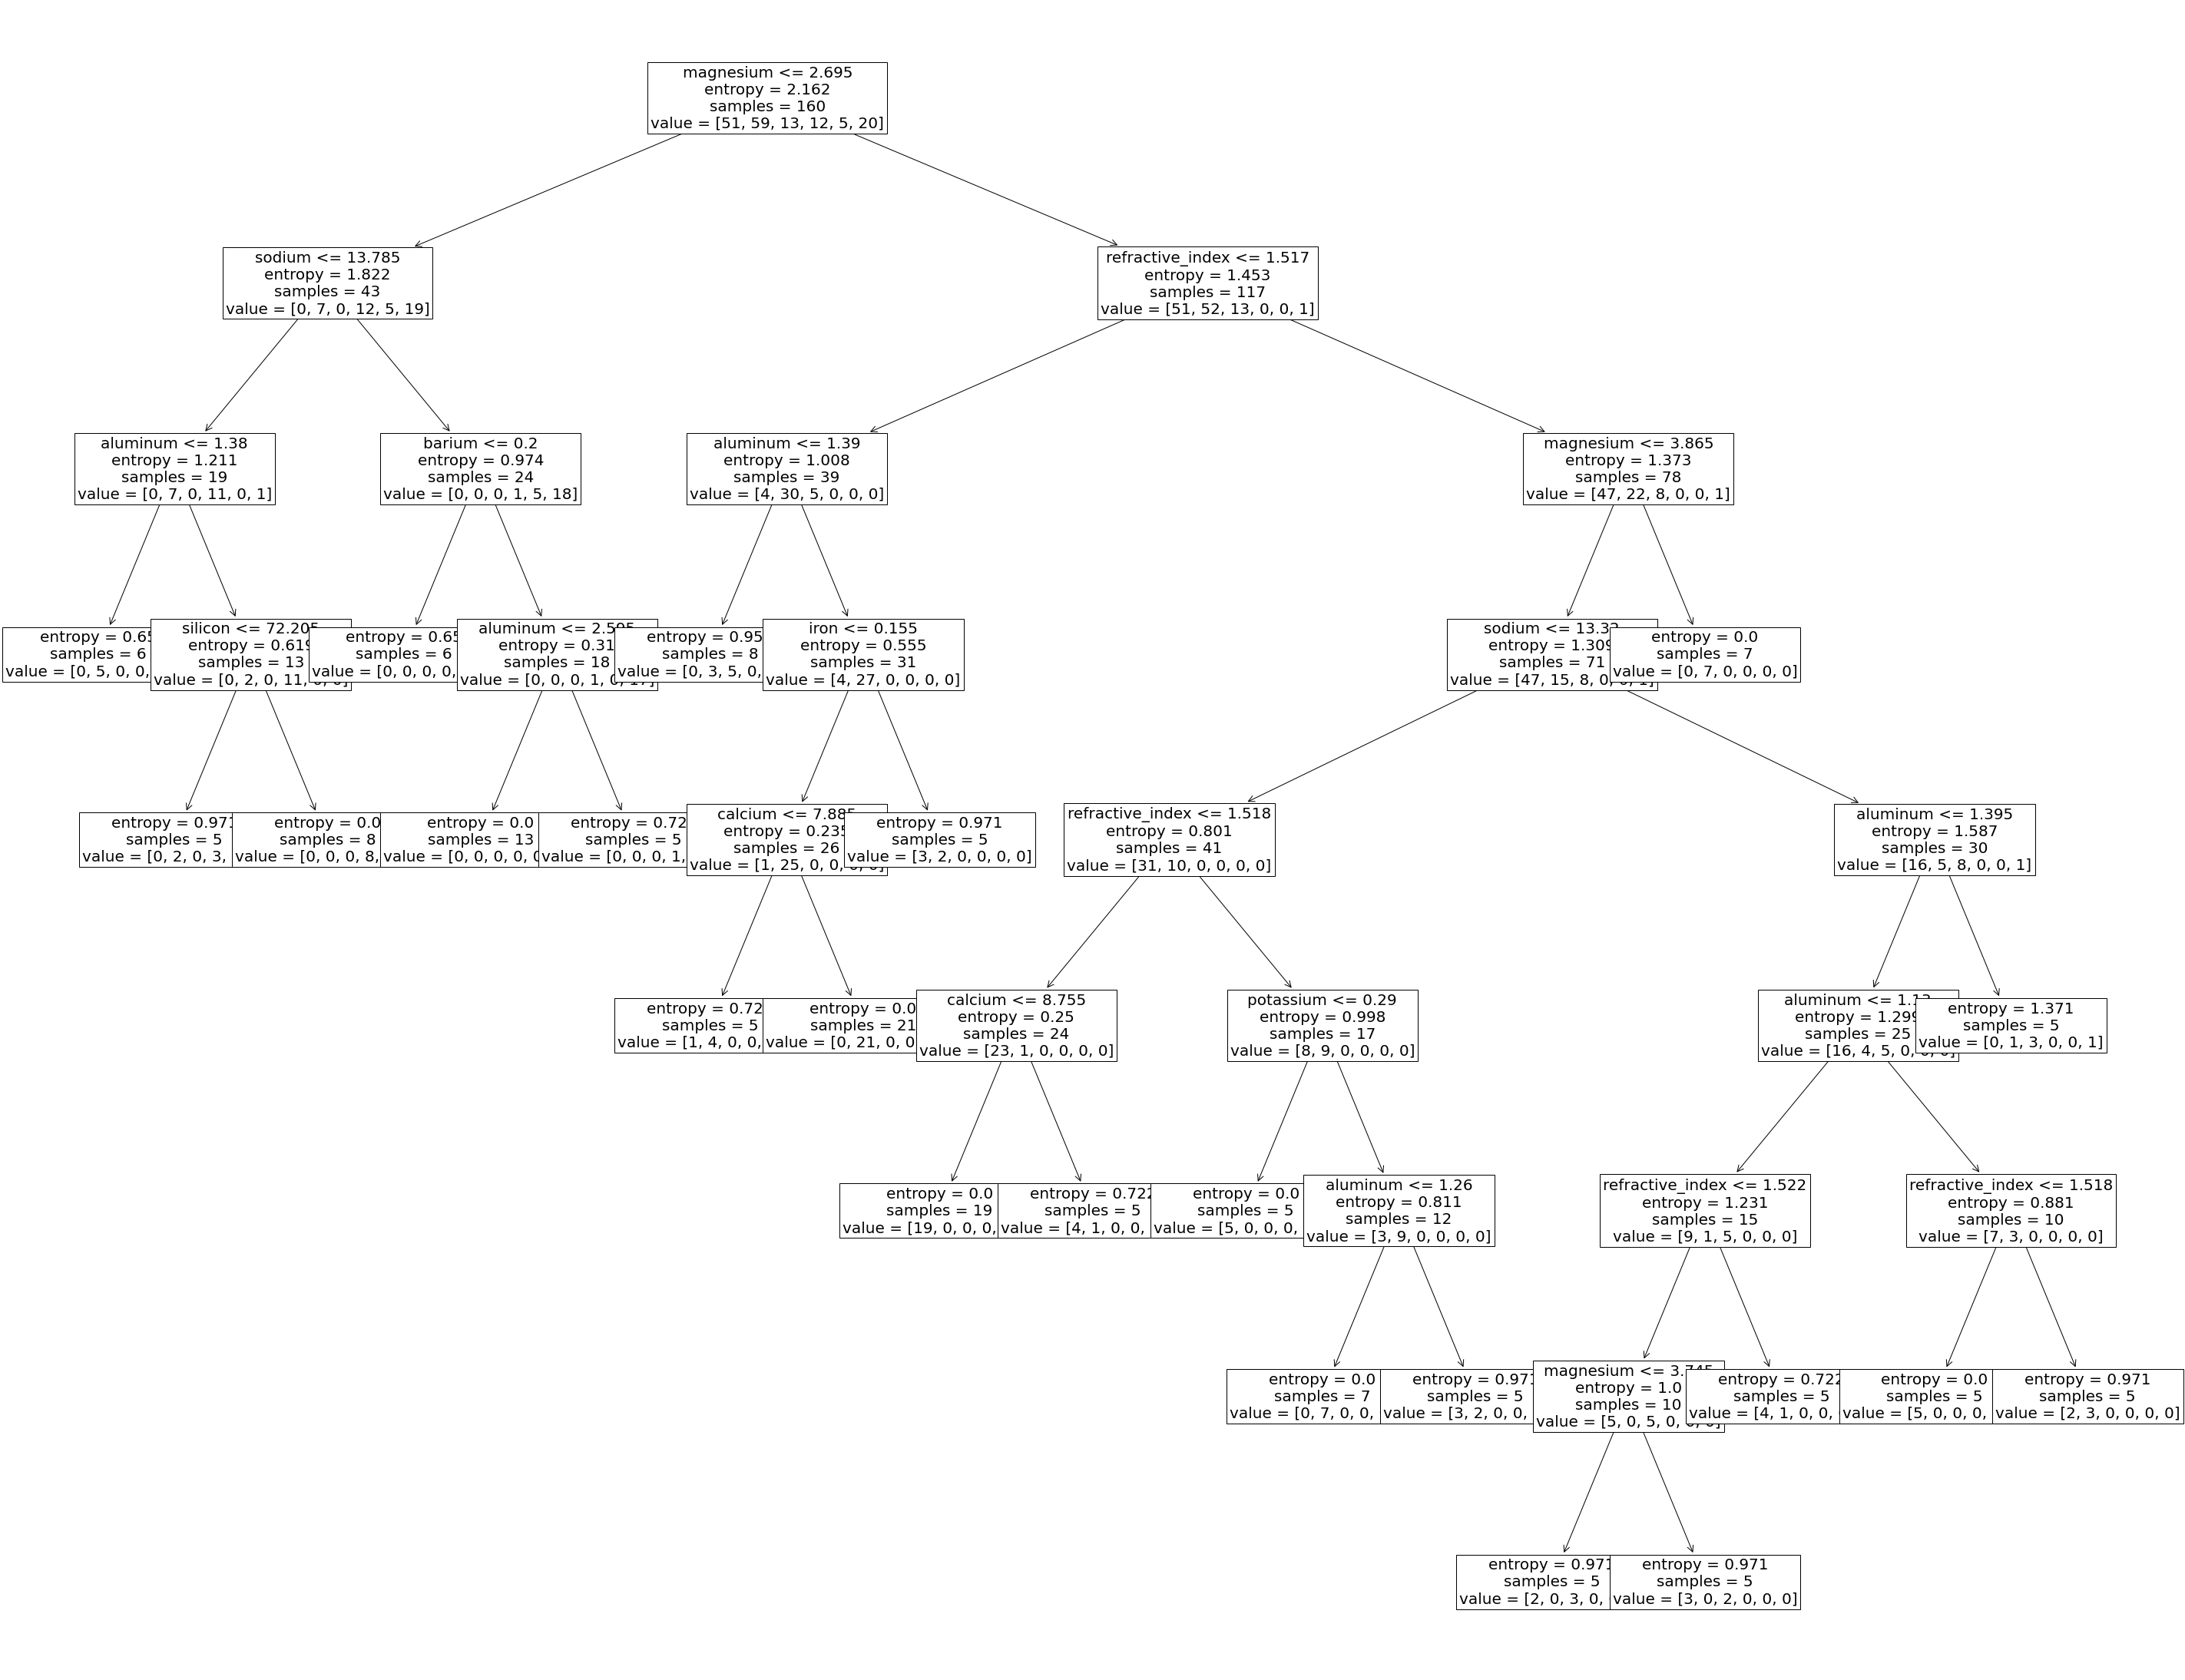

In [22]:
# Dibujad usando esta celda
fig, ax = plt.subplots(figsize=(50, 40))
plot_tree(model, feature_names=X.columns, fontsize=20)
plt.show()

- EVALUAMOS EL MODELO

In [23]:
# Vemos que el entrenamiento consigue un 100%
model.score(X_train, Y_train)*100

85.625

In [24]:
model.score(X_test, Y_test)*100

57.407407407407405

In [26]:
f1_score(Y_test, model.predict(X_test), average='micro')

0.5740740740740741

In [27]:
balanced_accuracy_score(Y_test, model.predict(X_test))

0.7026430455223025

- Analisis de resultados

 Observamos que realizando el arbol de decisión con hiperparámetros comparado con el inicial, reducimos la diferencia en la evaluación del modelo de train y test. Y vemos que disminuye el entrenamiento, generalizando más dado que en el proceso anterior nos daba un 100%, cosa que lo que hacia era aprender de memoria y no realizar optimamente el desarrollo.

**5. BAGGING**

In [56]:
np.random.seed(123) 

In [57]:
X = dataframe.iloc[:,:-1]
Y = dataframe.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [58]:
base_estimator = LogisticRegression(max_iter=300)
model = BaggingClassifier(base_estimator, n_estimators=5, max_samples=10, max_features=2)

In [59]:
base_estimator2 = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=10)
model2 = BaggingClassifier(base_estimator2, n_estimators=30, max_samples=100, max_features=3)

In [61]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



BaggingClassifier(base_estimator=LogisticRegression(max_iter=300),
                  max_features=2, max_samples=10, n_estimators=5)

In [52]:
model2.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        min_samples_leaf=10),
                  max_features=3, max_samples=100, n_estimators=300)

In [50]:
model.score(X_test, Y_test)

0.46296296296296297

In [53]:
model2.score(X_test, Y_test)

0.6666666666666666

In [54]:
base_estimator.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=300)

In [55]:
base_estimator.score(X_test, Y_test)

0.5925925925925926